In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv(r"C:\Users\epist\Documents\PYTHON TUTORIALS\SUPERVISED ML CASE STUDY PROJECT\Loan_default.csv")

In [8]:
data.head(2)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [10]:
##NO MISSING VALUE IN THIS DATA 

In [11]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


# REMOVE IRRELEVANT COULMNS

In [12]:
data.drop("LoanID", axis=1, inplace=True)

In [13]:
data.head(4)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0


# CHeck for missing values

In [14]:
data.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

<Axes: >

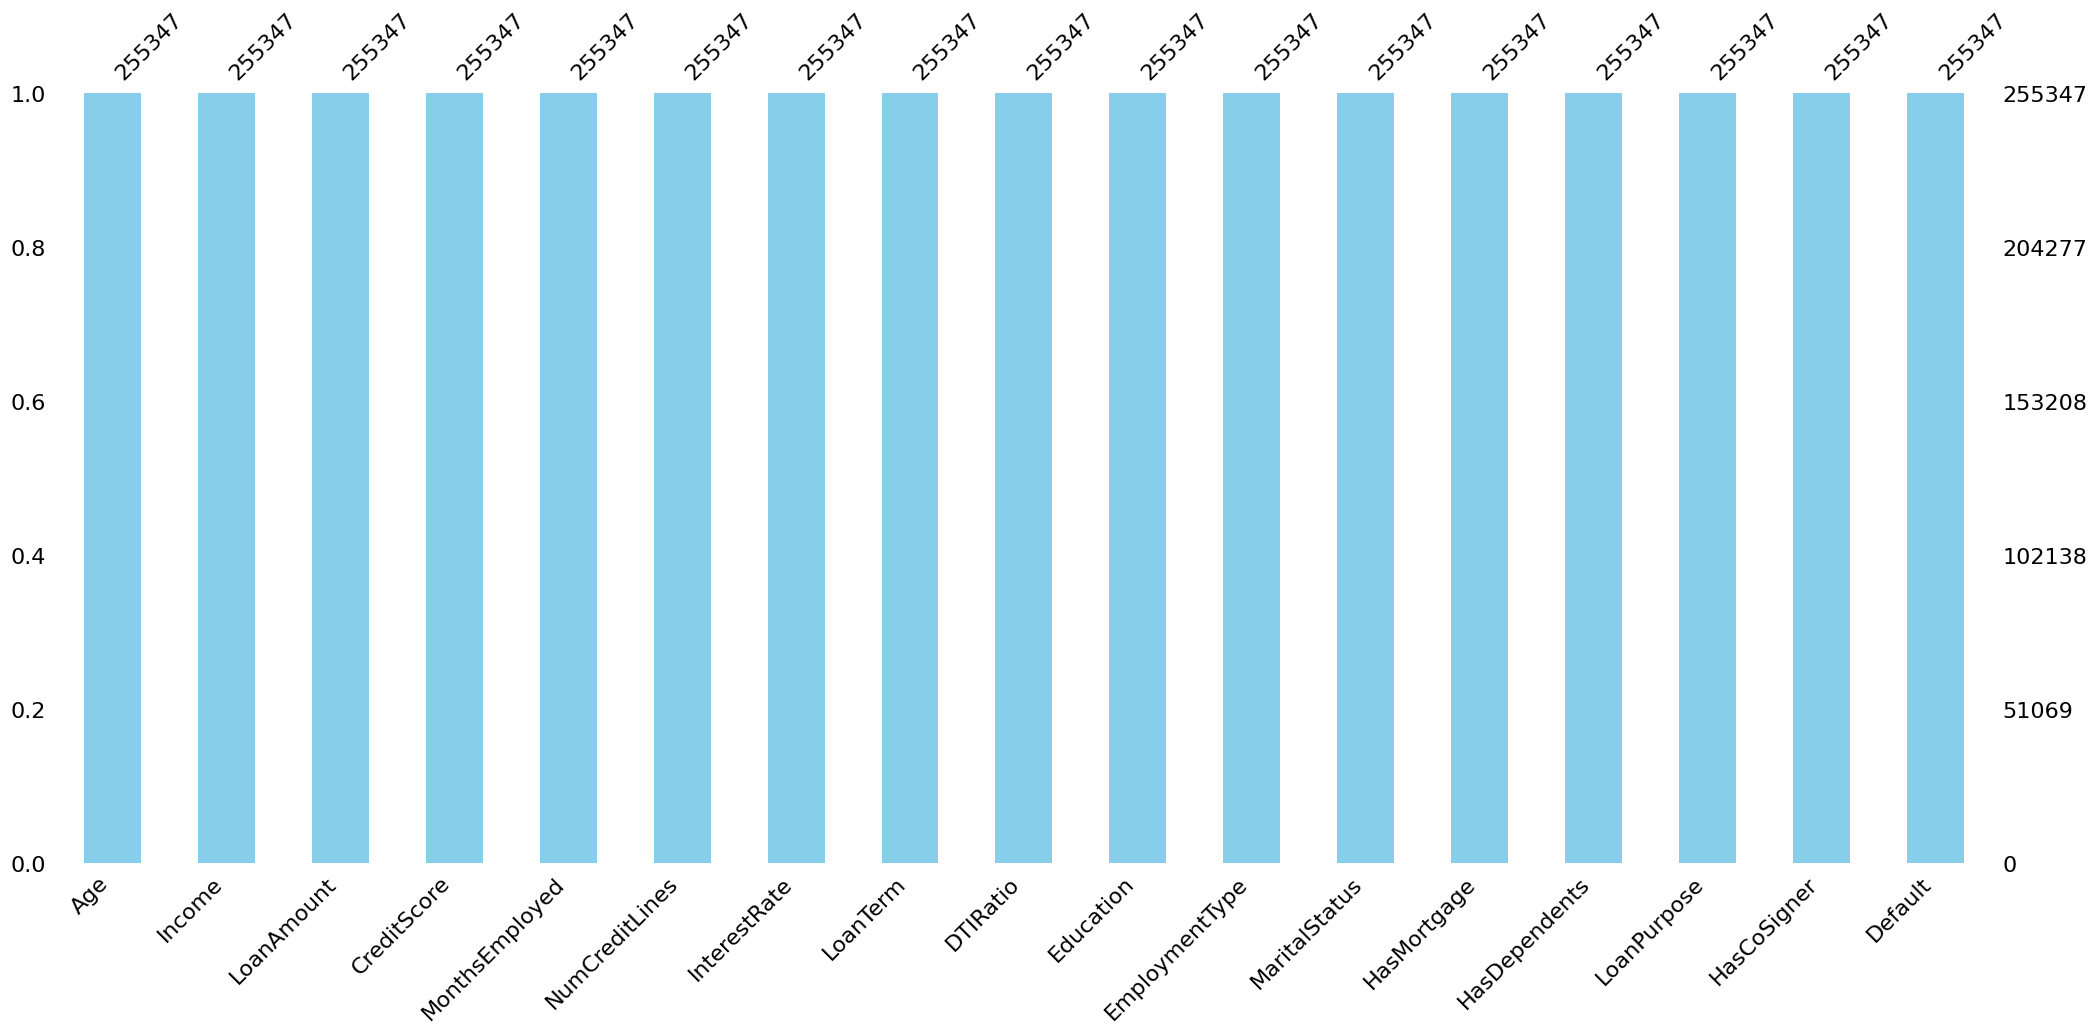

In [15]:
import missingno as msno

msno.bar(data, color='skyblue')

In [16]:
##CHECKING FOR DUPLICATES

In [17]:
data.duplicated().sum()

0

In [18]:
#NO DUPLICATE

In [19]:
#Handle Outliers Check for outliers in numerical columns.
#Lets investigate the numerical columns for outliers by visualizing their distributions on histplot

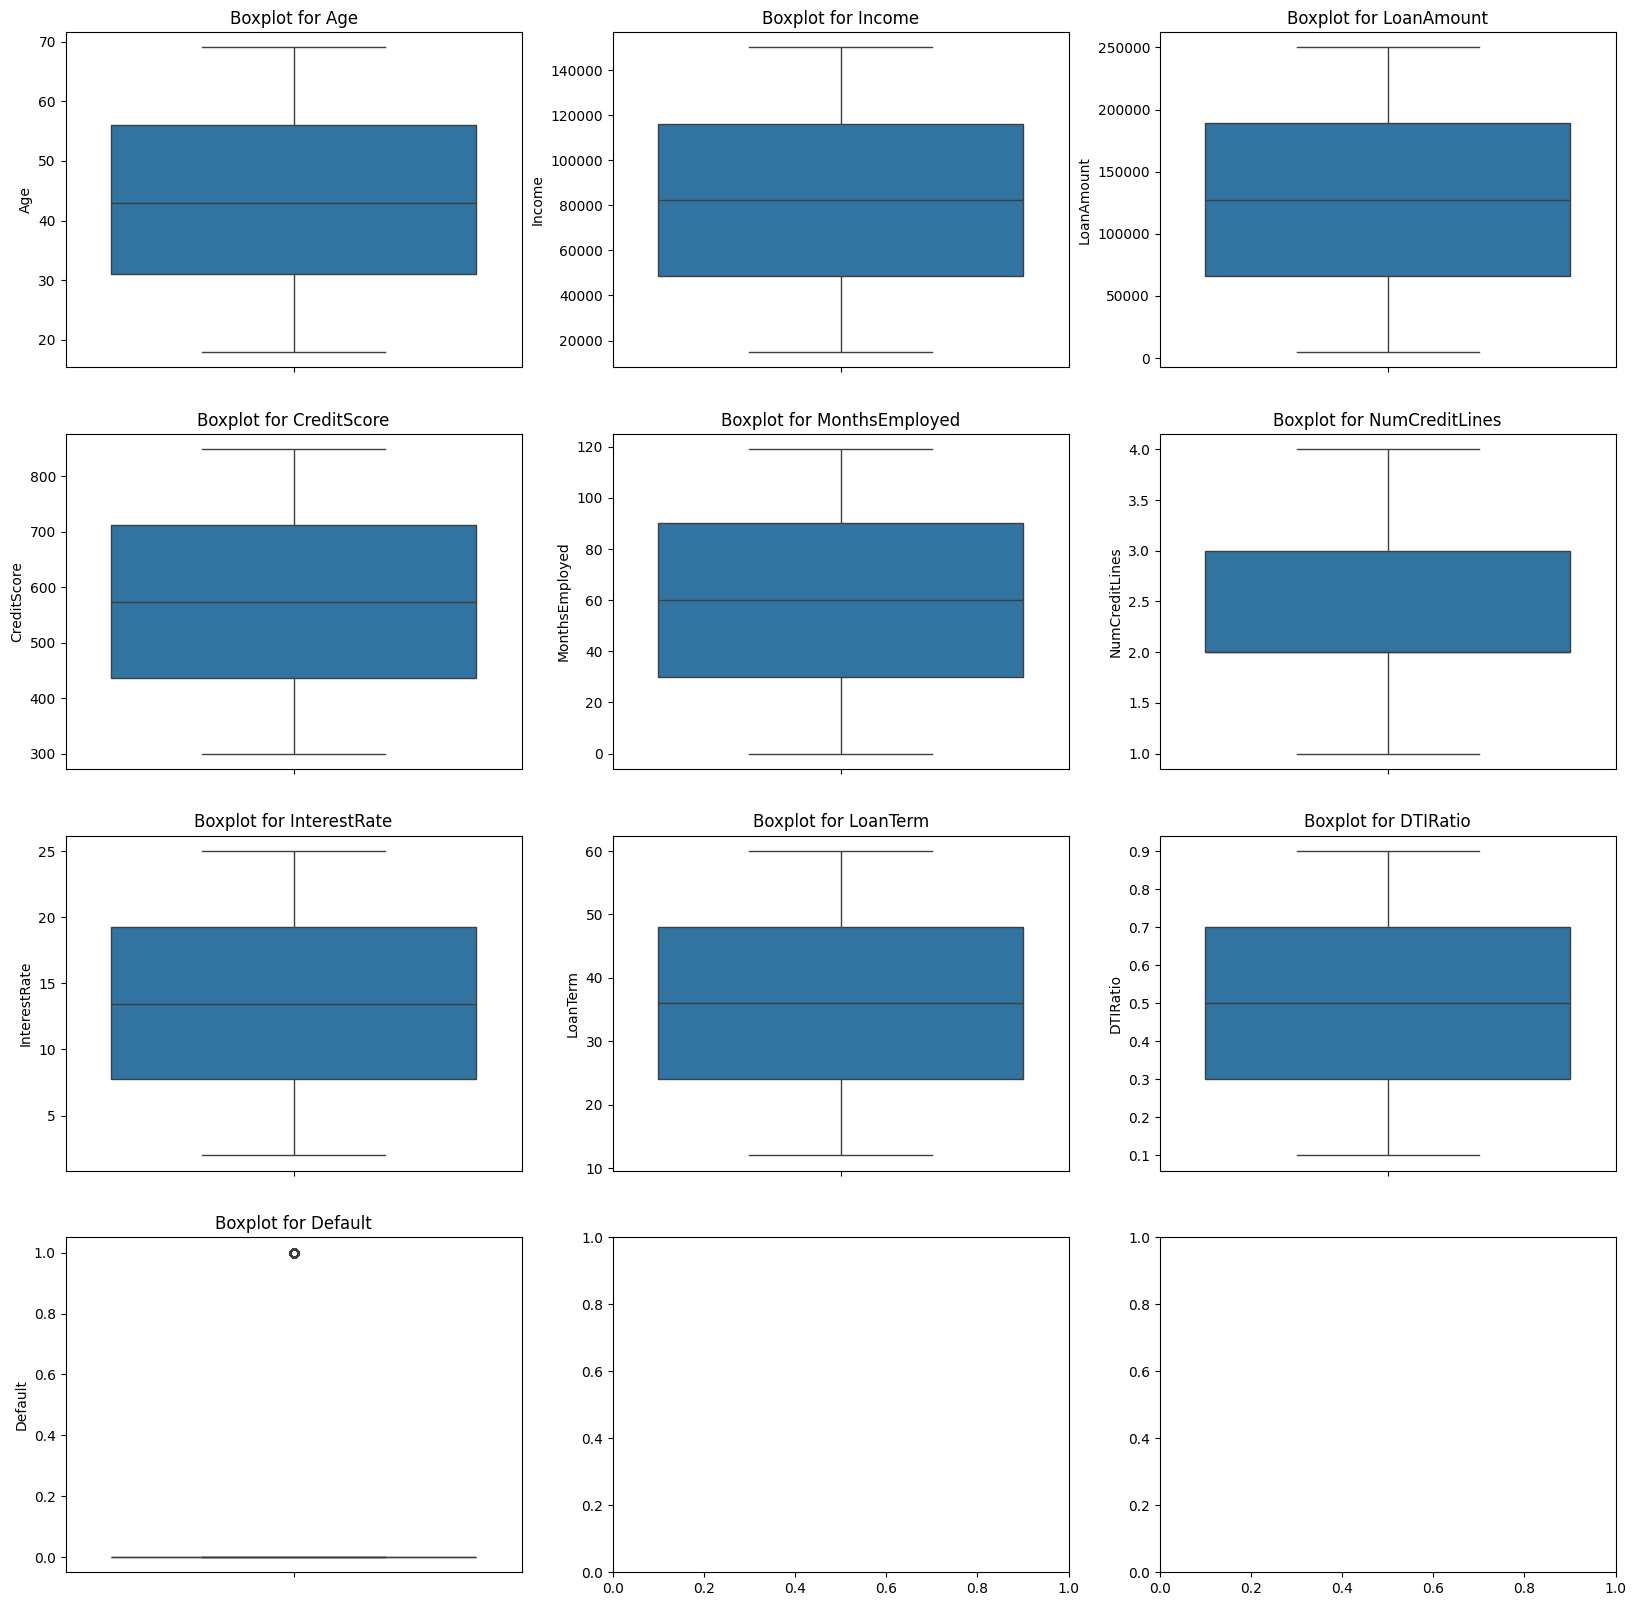

In [20]:
numerical_columns = data.select_dtypes(include="number")

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
ax=ax.flatten()
for idx, col in enumerate(numerical_columns):
    sns.boxplot(data[col], ax=ax[idx])
    ax[idx].set_title(f"Boxplot for {col}")
plt.show()

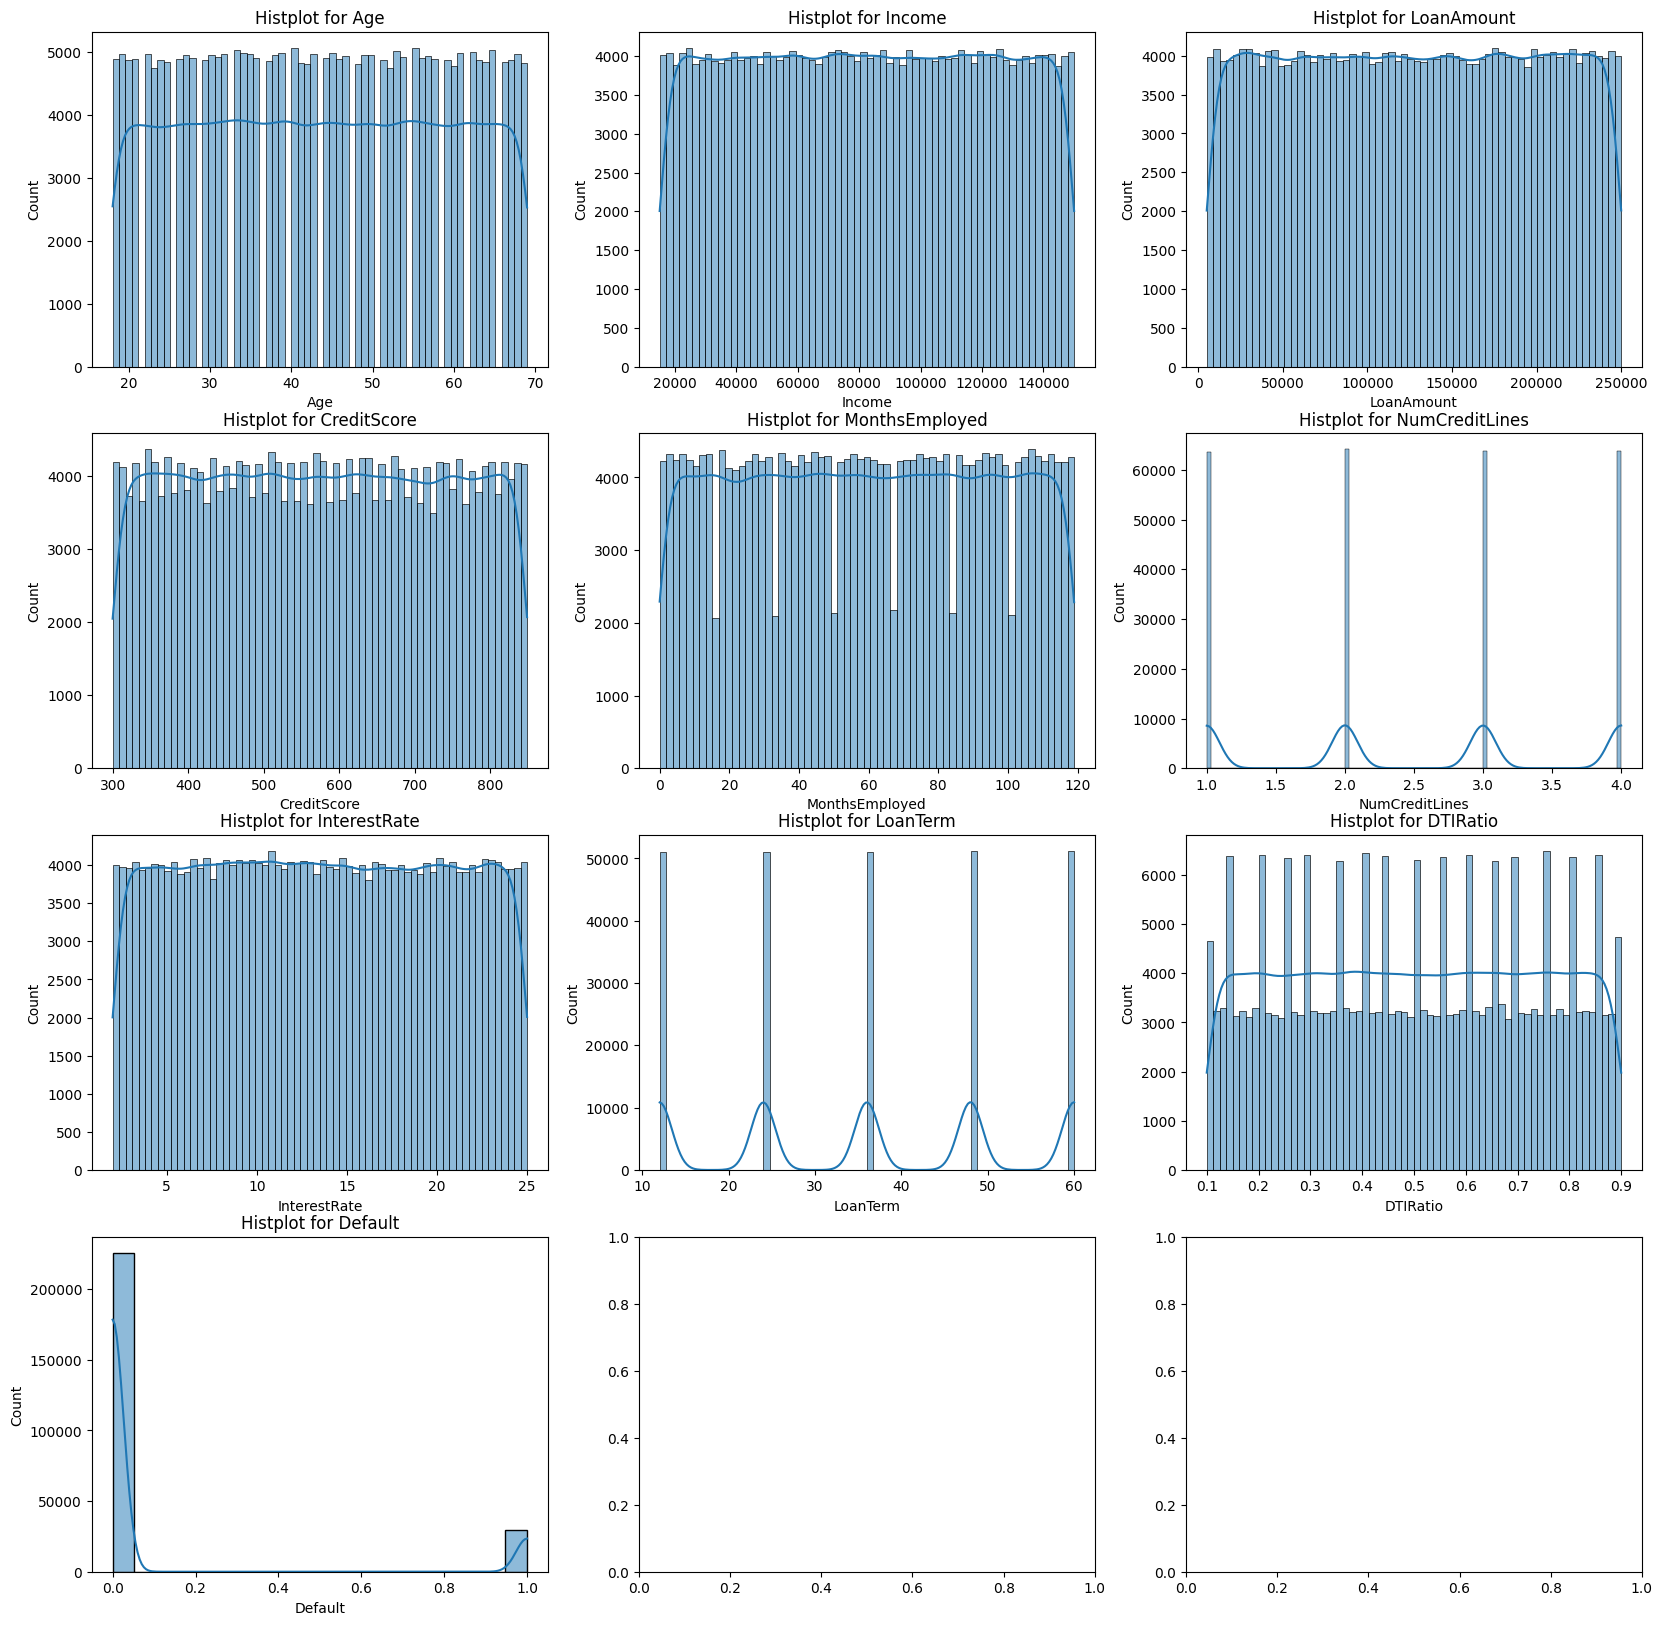

In [21]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
ax = ax.flatten()
for idx, col in enumerate(numerical_columns):
    # Add kde parameter to histplot function instead
    sns.histplot(data[col], ax=ax[idx], kde=True)
    ax[idx].set_title(f"Histplot for {col}")
plt.show()

In [22]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [23]:
!pip install scikit-learn

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
#Encode Categorical Variables Convert categorical variables like EmploymentType	MaritalStatus	
#HasMortgage	HasDependents	LoanPurpose	HasCoSigner into numeric formats.

In [26]:
# Label encoding for binary categories
label_enc = LabelEncoder()
data['EmploymentType'] = label_enc.fit_transform(data['EmploymentType'])  
data['MaritalStatus'] = label_enc.fit_transform(data['MaritalStatus'])
data['HasMortgage'] = label_enc.fit_transform(data['HasMortgage'])
data['HasDependents'] = label_enc.fit_transform(data['HasDependents'])
data['LoanPurpose'] = label_enc.fit_transform(data['LoanPurpose'])
data['HasCoSigner'] = label_enc.fit_transform(data['HasCoSigner'])
data['Education'] = label_enc.fit_transform(data['Education'])

In [27]:
data.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0


In [29]:
#SCALING OF THE DATA Scale Numerical Features Scale numerical columns to bring them to a similar range, which can improve model performance.

#**STANDARD SCALER--- NORMAL OR SLIGHTLY SKEWED DISTRIBUTION ***MINMAX SCALER----UNIFORM DISTRIBUTION ****ROBUST SCALER-----HEAVILY SKEWED

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()
num_cols_to_scale =['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
data[num_cols_to_scale] = scaler.fit_transform(data[num_cols_to_scale])

In [32]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,0,0,0,1,1,4,1,0
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,2,0,1,0,0,4,1,0
2,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,2,3,0,1,1,0,0,1
3,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,1,0,1,0,0,1,0,0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,0,3,0,0,1,0,0,0


In [33]:
#Check Class Distribution Assess the balance of the target variable (Attrition) to determine if we need to handle class imbalance.

In [34]:
# Check class distribution
data['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

In [35]:
data['Default'].value_counts(normalize=True)*100

Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64

<Axes: xlabel='Default', ylabel='count'>

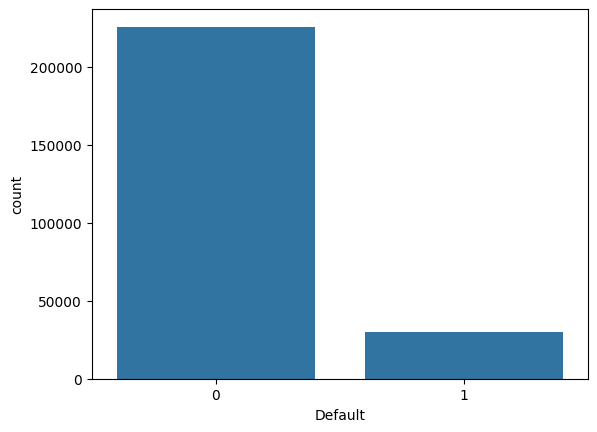

In [36]:
sns.countplot(x=data['Default'])

In [37]:
###Handling Class Imbalance### Techniques to Address Class Imbalance Resampling: 
###Oversampling the minority class using techniques like SMOTE 
###(Synthetic Minority Oversampling Technique). Undersampling the
###majority class to balance proportions. Class Weights: Add weights 
###to the classes in the loss function during model training to penalize
###misclassifications of the minority class. Evaluation Metrics: Use metrics
###like precision, recall, F1-score, or ROC-AUC instead of just accuracy

#Oversampling with SMOTE

In [38]:
!pip install imbalanced-learn

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
# Separate features and target
X = data.drop('Default', axis=1)
y = data['Default']

In [41]:
X.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,0,0,0,1,1,4,1
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,2,0,1,0,0,4,1
2,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,2,3,0,1,1,0,0
3,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,1,0,1,0,0,1,0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,0,3,0,0,1,0,0


In [42]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [43]:
y_resampled.value_counts()

Default
0    225694
1    225694
Name: count, dtype: int64

In [44]:
y_resampled.value_counts(normalize=True)*100

Default
0    50.0
1    50.0
Name: proportion, dtype: float64

<Axes: xlabel='Default', ylabel='count'>

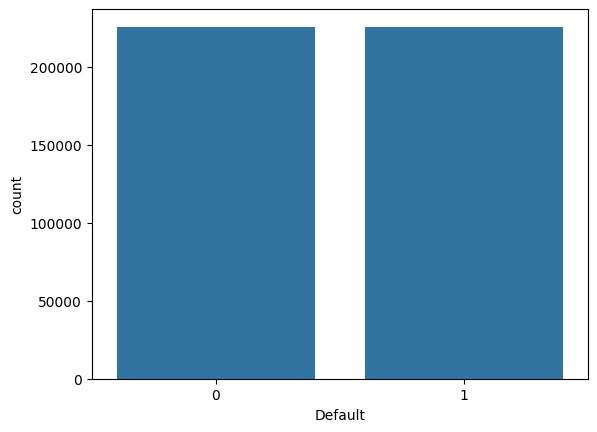

In [45]:
sns.countplot(x=y_resampled)

# Final Dataset Ready¶
# At this stage, the dataset is clean and prepared for the next step in the workflow.

In [46]:
# Save the cleaned dataset for future use
data.to_csv('Loan_Prediction.csv', index=False)

# Data Splitting
# We’ll split the cleaned dataset into training and testing sets, ensuring the target variable’s distribution is representative in both.



In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled  # Stratify to maintain class proportions
)

In [49]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 361110
Testing set size: 90278


In [50]:
# Proportion of Train set distribution
y_train.value_counts(normalize=True)*100

Default
1    50.0
0    50.0
Name: proportion, dtype: float64

In [51]:
# Proportion of Test set distribution
y_test.value_counts(normalize=True)*100

Default
1    50.0
0    50.0
Name: proportion, dtype: float64

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
# Train logistic regression model
logreg = LogisticRegression(random_state=42)
# logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [54]:
# Predict on the test set
y_pred = logreg.predict(X_test)

In [55]:
# Evaluate performance
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.68      0.70     45139
           1       0.70      0.72      0.71     45139

    accuracy                           0.70     90278
   macro avg       0.70      0.70      0.70     90278
weighted avg       0.70      0.70      0.70     90278



 ### 2. Train Advanced Models (Random Forest)

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest model
# rf = RandomForestClassifier(class_weight={0:1, 1:3}, random_state=42, n_estimators=100)
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
# Predict on the test set
y_pred_rf = rf.predict(X_test)
# Evaluate performance
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
# !pip install xgboost
from xgboost import XGBClassifier

In [26]:
# Define the models
# class_weights={0:1, 1:3}
class_weights='balanced'
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight=class_weights),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight=class_weights),
    'Support Vector Machine': SVC(random_state=42, class_weight=class_weights),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight=class_weights),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42, algorithm="SAMME"),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')
}

Training Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.53      0.80      0.64        10

    accuracy                           0.55        20
   macro avg       0.57      0.55      0.52        20
weighted avg       0.57      0.55      0.52        20



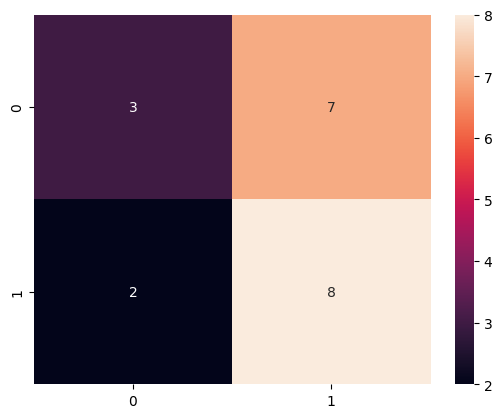

Training Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.70      0.61        10
           1       0.57      0.40      0.47        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.54        20
weighted avg       0.55      0.55      0.54        20



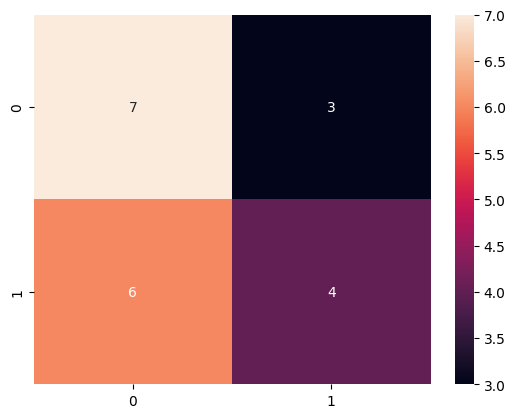

Training Support Vector Machine...
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.55      0.60      0.57        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



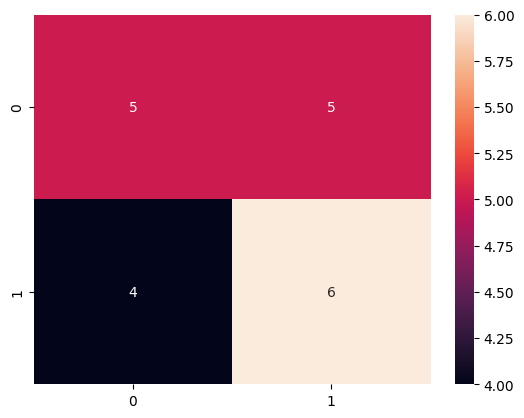

Training k-Nearest Neighbors...
k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.71      0.50      0.59        10

    accuracy                           0.65        20
   macro avg       0.66      0.65      0.64        20
weighted avg       0.66      0.65      0.64        20



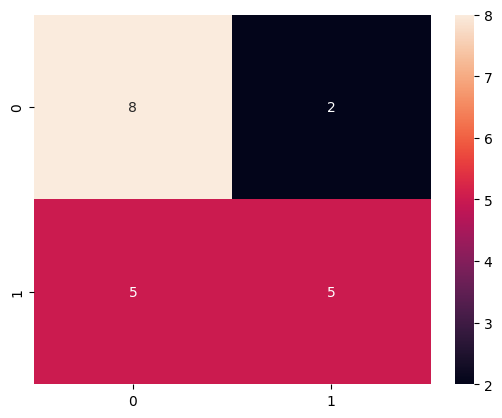

Training Decision Tree...
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.70      0.58        10
           1       0.50      0.30      0.38        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.48        20
weighted avg       0.50      0.50      0.48        20



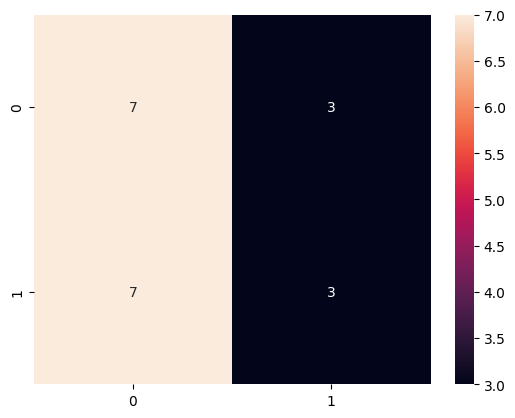

Training Gradient Boosting...
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.90      0.69        10
           1       0.75      0.30      0.43        10

    accuracy                           0.60        20
   macro avg       0.66      0.60      0.56        20
weighted avg       0.66      0.60      0.56        20



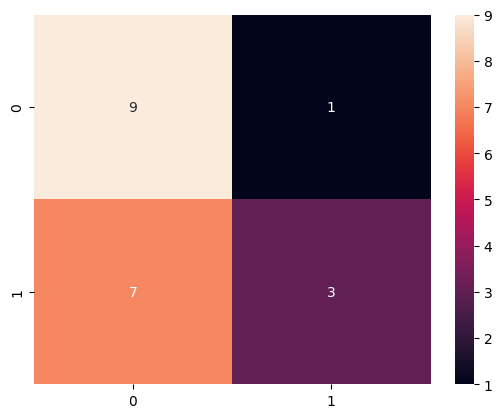

Training AdaBoost...
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.60      0.52        10
           1       0.43      0.30      0.35        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.44        20
weighted avg       0.45      0.45      0.44        20



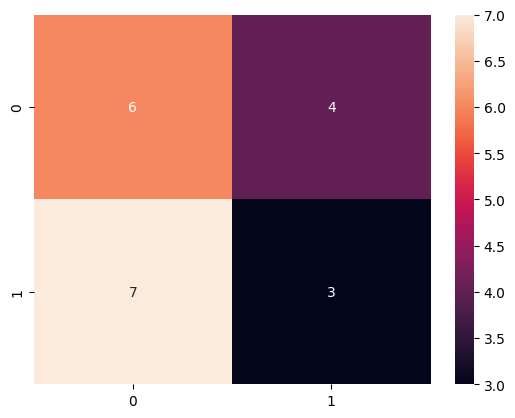

Training XGBoost...
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           1       0.50      0.40      0.44        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.50      0.50      0.49        20



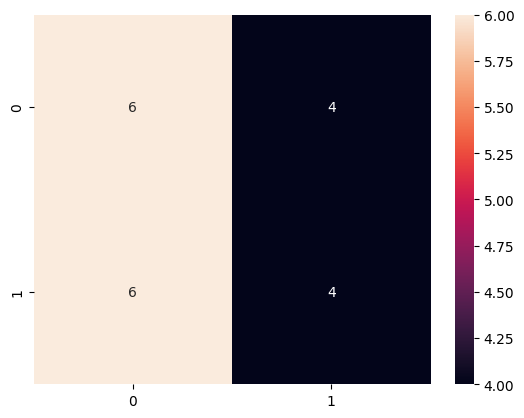

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)  # Now properly imported
    
    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': matrix
    }
    # print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n{report}")

    sns.heatmap(matrix, annot=True, fmt="g")
    plt.show()

In [ ]:
#4. Hyperparameter Tuning
# We’ll use grid search to optimize hyperparameters for the Random Forest model

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [35]:
grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid, cv=5, scoring='f1', n_jobs=-1
)

In [36]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [37]:
# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [38]:
# Train best model
best_rf = grid_search.best_estimator_

In [39]:
# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test)

In [40]:
# Evaluate performance
print("Tuned Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_best_rf))

Tuned Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.44      0.40      0.42        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.45      0.45      0.45        20



In [ ]:
#Model Evaluation
#We’ll perform a detailed evaluation using metrics like precision, recall,
#F1-score, and AUC-ROC. Confusion matrices and AUC curves will help visualize performance.

In [ ]:
#Confusion Matrix
#Confusion matrix to visualize misclassifications.

In [42]:
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)

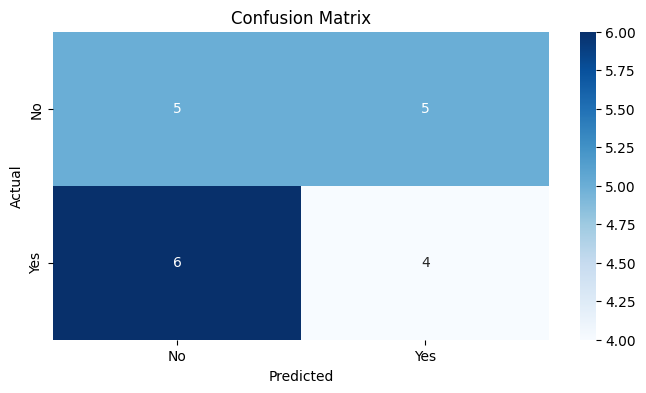

In [44]:
# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
#ROC Curve and AUC Score
#ROC-AUC to evaluate the model's ability to distinguish between classes.

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

In [46]:
# Compute probabilities for ROC
y_probs = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

In [47]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

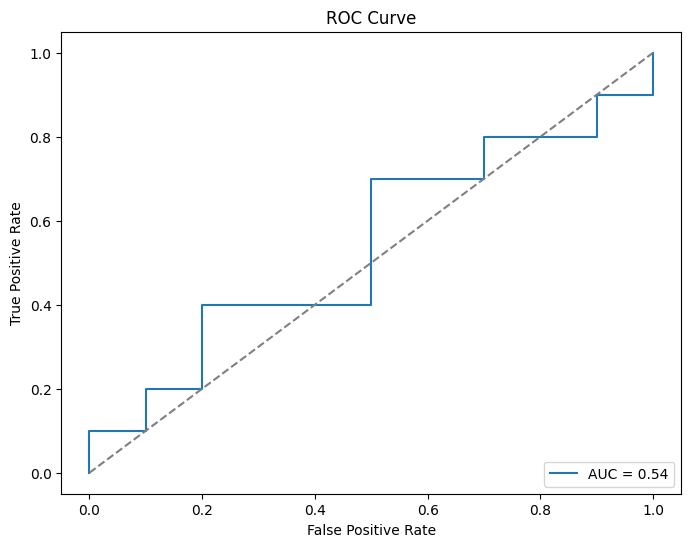

In [48]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [52]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split  # Added missing import
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import pandas as pd  # Added pandas import

# Load your dataset
# Replace this with your actual data loading code
data = pd.read_csv('loan_prediction.csv')  # Uncomment and specify your dataset path

# Features & target
X = data.drop(columns=['Default'])
y = data['Default']

# Identify categorical and numerical columns
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore',
                  'MonthsEmployed', 'NumCreditLines', 'InterestRate',
                  'LoanTerm', 'DTIRatio']

categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus',
                    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# SMOTE + RandomForest Pipeline
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=None,
                                          min_samples_split=10, min_samples_leaf=1,
                                          class_weight='balanced', n_jobs=-1,
                                          random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

ROC AUC: 0.7202

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     45170
           1       0.30      0.20      0.24      5900

    accuracy                           0.85     51070
   macro avg       0.60      0.57      0.58     51070
weighted avg       0.83      0.85      0.84     51070


Confusion Matrix:
 [[42403  2767]
 [ 4726  1174]]


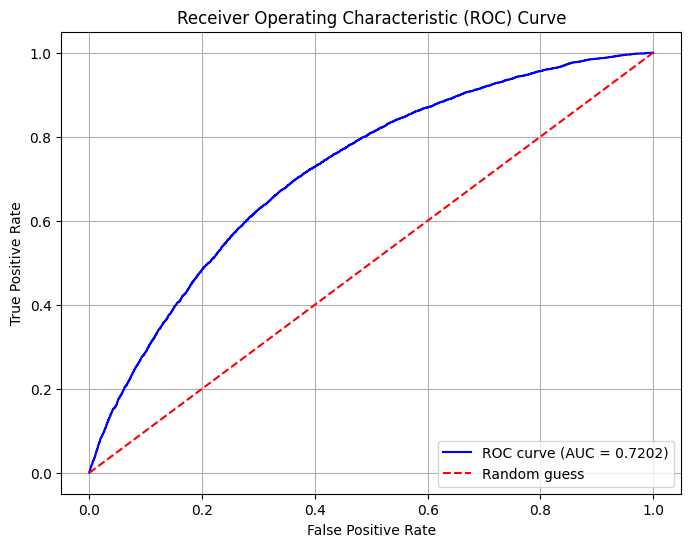

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probabilities for the positive class
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()